# To do
Try on the smaller dataset in finding hypers, then train on all at end

# Ideas
We can use synword tokenization and compare to word tokenization?

# Colab Setup

In [ ]:
    from google.colab import drive
    drive.mount('/content/drive')
 

Mounted at /content/drive


# Importing Libraries

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 1.2 MB 32.8 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 189 kB 47.3 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 51 kB 318 kB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from IPython.display import display,HTML

# Reading dataset

## Read Vaccin Dataset

In [ ]:
#Path to my data files
path_vax = "/content/gdrive/MyDrive/CSC461/Max-Drafts/data_set/vaccination_all_tweets.csv"

vax_tweets = pd.read_csv(path_vax)


## Read Tweet Dataset

In [ ]:
#Path to my data files
path_tweets = "/content/gdrive/MyDrive/CSC461/Max-Drafts/data_set/tweet_dataset.csv"

tweets = pd.read_csv(path_tweets)


# EDA


## Number of Samples and Features

In [ ]:
tweets.shape

(40000, 8)

In [ ]:
vax_tweets.shape

(212982, 16)

## Dataset Structure

In [ ]:
vax_tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
tweets.head()

,textID,sentiment,author,text,old_text,aux_id,new_sentiment,selected_text
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier and i started freakin at his part =[,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,p1000000000,NaN,NaN
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,Layin n bed with a headache ughhhh...waitin on your call...,c811396dc2,negative,headache
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,9063631ab1,negative,gloomy
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends SOON!,2a815f151d,positive,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,"We want to trade with someone who has Houston tickets, but no one will.","@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",82565a56d3,neutral,"We want to trade with someone who has Houston tickets, but no one will."


# List of Columns

In [ ]:
list(tweets.columns)

['textID',
 'sentiment',
 'author',
 'text',
 'old_text',
 'aux_id',
 'new_sentiment',
 'selected_text']

In [ ]:
list(vax_tweets.columns)

['id',
 'user_name',
 'user_location',
 'user_description',
 'user_created',
 'user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'date',
 'text',
 'hashtags',
 'source',
 'retweets',
 'favorites',
 'is_retweet']

# language model Creation steps
* Tokenization
* Numericalization
* Language model data loader creation
* Language model creation

## Tokenization
convert the text into a list of words

fastai can handle text preprocessing and tokenization for us. So we dont do tokenization directly?? it will be self contained in the dataloder command??

test_ in the next steps will  be a dependent variable fastai created for us. By default fastai uses "word tokenization", which splits the text on spaces and punctuation marks and breaks up words like can't into two separate tokens.

We can make data loader with "subword tokenization" instead, which will split the text on commonly occuring groups of letters instead of spaces.

In [ ]:
from fastai.text.all import *

## Functions for preprocessing

In [ ]:
# Code via https://www.kaggle.com/garyongguanjie/comments-analysis

def de_emojify(inputString): #What does it do???????????
    return inputString.encode('ascii', 'ignore').decode('ascii') 

# Code via https://www.kaggle.com/pawanbhandarkar/generate-smarter-word-clouds-with-log-likelihood

def tweet_proc(df, text_col='text'):#removing handles, urls, hashtags
#always the name of "text_col" should be "text"

    df['orig_text'] = df[text_col]#making a new col named "orig_text"

    # Remove twitter handles
    df[text_col] = df[text_col].apply(lambda x:re.sub('@[^\s]+','',x))

    # Remove URLs
    df[text_col] = df[text_col].apply(lambda x:re.sub(r"http\S+", "", x))

    # Remove emojis
    df[text_col] = df[text_col].apply(de_emojify)#where is de_emojify func comming from???????

    # Remove hashtags
    df[text_col] = df[text_col].apply(lambda x:re.sub(r'\B#\S+','',x))

    return df[df[text_col]!='']#removing rows with blank tweets



## preprocessing
### Clean the text col of both dataset and matching their text and sentiment columns

In [ ]:

#Making a new tweets dataframe out of "text" and "sentiment" columns 
tweets = tweets[['old_text', 'new_sentiment']].rename(columns={'old_text':'text', 'new_sentiment':'sentiment'}) 

#vax_tweets does NOT have sentiment col, so we assign nan to be able to append it to tweets df later
vax_tweets['sentiment'] = np.nan 

#cleaning tweets df using cleaning func above
tweets = tweet_proc(tweets)

#cleaning vax_tweets df using cleaning func above
vax_tweets = tweet_proc(vax_tweets) 

## combine the dfs

In [ ]:
#combining two (tweets and vax_tweets) dataframes into df_lm
df_lm = tweets[['text', 'sentiment']].append(vax_tweets[['text', 'sentiment']])

#Dropping all rows with no sentiment (all vax_tweets and some of tweets)
df_clas = df_lm.dropna(subset=['sentiment']) 

# Length of combined dataset and non-nan dataset
print(len(df_lm), len(df_clas))

252905 31323


In [ ]:
tweets.head()
# " TEXT" column is processed text, and orig_text is original unprocessed

,text,sentiment,orig_text
0,i know i was listenin to bad habit earlier and i started freakin at his part =[,NaN,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,Layin n bed with a headache ughhhh...waitin on your call...,negative,Layin n bed with a headache ughhhh...waitin on your call...
2,Funeral ceremony...gloomy friday...,negative,Funeral ceremony...gloomy friday...
3,wants to hang out with friends SOON!,positive,wants to hang out with friends SOON!
4,"We want to trade with someone who has Houston tickets, but no one will.",neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."


# Training Language Model

### converts our input data into a DataLoader object that can be used as an input to a fastai Learner
We use whole dataset including samples with no sentiment for language model training, but later we only use data with sentiment label for classifier training

In [ ]:
dls_lm = TextDataLoaders.from_df(df_lm, text_col='text', is_lm=True, valid_pct=0.1)# data loader of language model

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
# first two rows of the DataLoader using show_batch.
dls_lm.show_batch(max_n=2)
# When was text_ created??? We have a new column, text_, which is text offset by one. This is the dependent variable fastai created for us.

,text,text_
0,xxbos xxmaj thanks to 4 approving to b used in emergency cases ! ! xxbos xxmaj pincode : 560085 \n xxup covaxin - xxmaj dose 1 : 25 slots \n\n xxmaj age : 18 and above ( all xxmaj ages ) \n xxmaj date : 20 xxmaj oct 2021 \n xxmaj fees : 1050 \n xxup rakshobhya xxbos - xxmaj awe ! i miss my baby xxbos xxmaj coronavirus worldwide : xxmaj,xxmaj thanks to 4 approving to b used in emergency cases ! ! xxbos xxmaj pincode : 560085 \n xxup covaxin - xxmaj dose 1 : 25 slots \n\n xxmaj age : 18 and above ( all xxmaj ages ) \n xxmaj date : 20 xxmaj oct 2021 \n xxmaj fees : 1050 \n xxup rakshobhya xxbos - xxmaj awe ! i miss my baby xxbos xxmaj coronavirus worldwide : xxmaj the
1,"xxmaj fees : 1410 \n xxup manipal xxup whitefield xxup covaxi xxbos - xxmaj hopefully he wo n't discover all of my soap opera tweets . xxbos xxmaj there 's another chance to & & get your xxup covid vaccination at in tomorrow with the xxbos [ xxunk ] 411007 , 06 - 08 - 2021 , 185 dose1 at xxup pmc p xxup apollo xxup clinic xxup aundh , xxup aundh","fees : 1410 \n xxup manipal xxup whitefield xxup covaxi xxbos - xxmaj hopefully he wo n't discover all of my soap opera tweets . xxbos xxmaj there 's another chance to & & get your xxup covid vaccination at in tomorrow with the xxbos [ xxunk ] 411007 , 06 - 08 - 2021 , 185 dose1 at xxup pmc p xxup apollo xxup clinic xxup aundh , xxup aundh xxup"


# Fine-tuning the language model

In [ ]:
learn = language_model_learner(dls_lm, AWD_LSTM, drop_mult=0.3, metrics=[accuracy, Perplexity()]).to_fp16()

## Find optimum Learning Rate
When all layers are frozen except the last layer?

In [ ]:
# learn.lr_find()

**Partial dataset :** opt lr is about 5e-3

**Full dataset :** opt lr is about 2.51e-3

## Train for one epoch

In [ ]:
# learn.fit_one_cycle(1, 3 e-2)

## All dataset (212,983)

**Using lr = 0.03 I got accuracy = 0.439 **

Using lr = =0.0025 (valley?) acuracy = 0.409

Using lr 0.1 accuracy = 0.430

## partial tweet dataset (40,000)

Using lr 0.1 accuracy = 0.26

**Using lr = 0.03 I got accuracy = 0.267**

Using lr = 0.01 I got accuracy = 0.258

Using lr = =0.003 acuracy = 0.235

Using valley (0.005) acuracy = 0.245

If the used method for finding optimum lr does not work, what is the reason of that and how is it finding the opt lr? 
According to the lr diagram, if I choose valley point I am supposed to get a better accuracy?

Unfreezing all layers and finding the optimum lr for that, then retrain whith the corresponding new lr

In [ ]:
# learn.unfreeze()
# learn.lr_find()

**opt lr for all dataset (212,983) :** The opt lr is about 3.6 e-5???

**opt lr for partial dataset (40,000) :** 1.9 e-4 (or 4 e-4?)

## Training more than one epoch

Here we can see effect of number of epocks on the achived accuracy

In [ ]:
learn.fit_one_cycle(10, 3e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.352267,3.297301,0.421289,27.039562,19:07
1,3.356108,3.299842,0.426814,27.108366,18:53
2,3.292054,3.285192,0.429689,26.714127,18:58
3,3.237118,3.254530,0.432144,25.907434,19:25
4,3.191946,3.211095,0.439159,24.806242,19:03
5,3.086484,3.168968,0.444341,23.782921,19:00
6,2.996509,3.126706,0.448734,22.798765,19:09
7,2.918910,3.092399,0.452853,22.029861,19:14
8,2.820183,3.072560,0.456056,21.597122,19:06
9,2.762277,3.070729,0.456506,21.557613,19:10


**Partial Dataset:**

0 	: 0.255963

1 : 0.266344

2 : 0.290065

3 : 0.296962

**Full Dataset:**

0: 0.421289

1: 0.429689

2: 0.426814

3: 0.432144 	

4: 0.439159 	

5: 0.444341

6: 0.448734

7: 0.452853

8: 0.456056

9: 0.456506


In [ ]:
# Text generation using the language model
TEXT = "I love"
N_WORDS = 30
N_SENTENCES = 2
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

i love you ! Got my vaccine ! Thanks The Government of India has placed a fresh order for 25 crore doses of Made
i love How i went to my first dose and now i plan on getting my first dose at my doctor 's appointment ! YAY ! ! Pincode


## save the model encoder (all layers except the last one) so we can use it to fine-tune our classifier

In [ ]:
learn.save_encoder('finetuned_lm')

## Training a sentiment classifier

Using datablock to get the dataloader. We use datablock instead of dataloader??DataBlock API is more customisable. 

fastai handles tokenization and numericalization automatically when TextBlock is passed to DataBlock. 
Data loader in language model training and data block in classifier training handle tokenization and numericalization?


In [ ]:
dls_clas = DataBlock(##dataloaders used for classification
    blocks = (TextBlock.from_df('text', seq_len=dls_lm.seq_len, vocab=dls_lm.vocab), CategoryBlock),# Making a textblock from a df
    #Our x variable will be text contained in a pandas DataFrame.
    #We want to use the same sequence length and vocab as the language model DataLoaders so we can make use of our pre-trained model. ALL TWEET SAMPLES

    get_x=ColReader('text'),# Get data for the model by reading the text and sentiment columns
    get_y=ColReader('sentiment'),
    splitter=RandomSplitter()#o randomly split the data into a training set (80% by default) and a validation set (20%)
).dataloaders(df_clas, bs=64)#Builds the DataLoaders using the DataBlock template and ALL LABELED SAMPLES 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# Show Batch

In [ ]:


dls_clas.show_batch(max_n=2)



,text,category
0,xxbos xxmaj jus xxmaj got xxmaj hom xxmaj fr . xxunk xxmaj funeral … xxmaj i 'm xxmaj so xxmaj sad ! i xxmaj cried xxmaj so xxmaj much xxmaj times ! xxmaj much xxmaj love xxmaj xxunk i xxmaj never xxmaj got xxmaj to xxmaj say xxmaj my xxmaj last & ' goodbye & ' to xxmaj him .,negative
1,"xxbos xxmaj yeah xxmaj it xxmaj good xxmaj but do nt xxmaj click xxmaj the xxmaj red x xxmaj because xxmaj it xxmaj shuts xxmaj it xxmaj down xxmaj but xxmaj other xxmaj then xxmaj that xxmaj its xxmaj good xxmaj and xxmaj when u minimize xxmaj it , xxmaj it xxmaj goes ..",positive


# Initialising the Learner

In [ ]:
learn = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult=0.5, metrics=accuracy).to_fp16()

# Loading Encoder

In [ ]:
learn = learn.load_encoder('finetuned_lm')

# Fine-tuning the classifier

train the classifier using discriminative learning rates and gradual unfreezing



#  freeze all but the LAST layer

In [ ]:
learn.fit_one_cycle(10, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.917324,0.838295,0.608557,01:07
1,0.912776,0.863959,0.605683,01:08
2,0.911687,0.897579,0.581897,01:07
3,0.887512,0.843771,0.598819,01:07
4,0.894021,0.816603,0.625639,01:07
5,0.875667,0.829560,0.609994,01:15
6,0.890203,0.807160,0.633301,01:07
7,0.864990,0.786787,0.643838,01:08
8,0.872382,0.788629,0.642720,01:08
9,0.863733,0.785369,0.641284,01:07


**Partial Dataset :** Accuracy : 0.646

**FULL Dataset :** Accuracy : 

0: 0.608557

1: 0.605683

2: 0.581897

3: 0.598819

4: 0.625639

5: 0.609994

6: 0.633301

7: 0.643838

8: 0.642720

9: 0.641284

# freeze all but the LAST TWO layer

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(10, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.842989,0.780453,0.647350,01:10
1,0.781481,0.711954,0.694125,01:11
2,0.737175,0.715225,0.700032,01:10
3,0.703033,0.653909,0.728289,01:10
4,0.651963,0.650615,0.730364,01:10
5,0.636917,0.631972,0.743934,01:10
6,0.572893,0.635552,0.744093,01:10
7,0.550931,0.654545,0.739943,01:10
8,0.515858,0.654732,0.741379,01:10
9,0.497971,0.662056,0.741858,01:09


**Partial Dataset :** Accuracy : 0.692

**FULL Dataset :** Accuracy :

0: 0.647350

1: 0.694125

2: 0.700032

3: 0.728289

4: 0.730364

5: 0.743934

6: 0.744093

7: 0.739943

8: 0.741379

9: 0.741858

# freeze all but the LAST THREE layer

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(10, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.494909,0.667542,0.736750,01:19
1,0.539950,0.645700,0.739783,01:19
2,0.477099,0.649884,0.741699,01:19
3,0.457025,0.686451,0.745211,01:23
4,0.390816,0.722088,0.745051,01:20
5,0.324961,0.775946,0.733397,01:19
6,0.247021,0.850165,0.733876,01:18
7,0.215827,0.891041,0.738985,01:17
8,0.199932,0.904157,0.738346,01:17
9,0.188847,0.915391,0.740581,01:17


**Partial Dataset :** Accuracy : 0.715

**FULL Dataset :** Accuracy :

0: 0.736750

1: 0.739783

2: 0.741699

3: 0.745211

4: 0.745051

5: 0.733397

6: 0.733876

7: 0.738985

8: 0.738346

9: 0.740581



# Finally, let's unfreeze the entire model and train a bit more:


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.191645,0.939811,0.740262,01:36
1,0.185227,0.949469,0.735792,01:36
2,0.179407,0.956164,0.731641,01:37
3,0.159289,0.999342,0.731481,01:37
4,0.145050,1.003496,0.733238,01:36
5,0.156056,1.019987,0.742976,01:36
6,0.141041,1.038625,0.732439,01:37
7,0.128063,1.036805,0.739304,01:37
8,0.129210,1.048226,0.733716,01:36
9,0.118679,1.040203,0.740581,01:36


Partial Dataset : Accuracy :

0: 0.723819

1: 0.730045

2: 0.731960

FULL Dataset : Accuracy :

0: 0.740262

1: 0.735792

2: 0.731641

3: 0.731481

4: 0.733238

5: 0.742976

6: 0.732439

7: 0.739304

8: 0.733716

9: 0.740581

In [ ]:
learn.predict("I love")

('positive', TensorText(2), TensorText([7.9201e-06, 1.3763e-06, 9.9999e-01]))


# Analysing the tweets

To carry out sentiment analysis on the vaccine tweets, we can add them to the DataLoaders as a test set:


In [ ]:
pred_dl = dls_clas.test_dl(vax_tweets['text'])

In [ ]:
preds = learn.get_preds(dl=pred_dl)



Let's go ahead and check out the results.


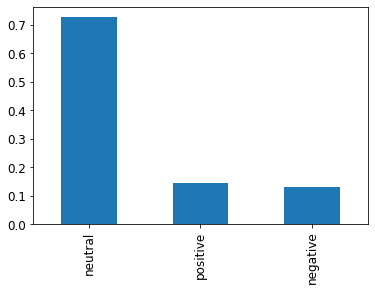

In [ ]:
# Get predicted sentiment
vax_tweets['sentiment'] = preds[0].argmax(dim=-1)
vax_tweets['sentiment'] = vax_tweets['sentiment'].map({0:'negative', 1:'neutral', 2:'positive'})

# Convert dates
vax_tweets['date'] = pd.to_datetime(vax_tweets['date'], errors='coerce').dt.date

# Save to csv
vax_tweets.to_csv('vax_tweets_sentiment.csv')

# Plot sentiment value counts
vax_tweets['sentiment'].value_counts(normalize=True).plot.bar();

# We can also visualise how sentiment changes over time:

In [ ]:


# Remove today's date since data is incomplete
today = pd.Timestamp.today().date()
vax_tweets = vax_tweets[vax_tweets['date']!=today]

# Get counts of number of tweets by sentiment for each date
timeline = vax_tweets.groupby(['date', 'sentiment']).agg(**{'tweets': ('id', 'count')}).reset_index().dropna()

# Plot results
import plotly.express as px
fig = px.line(timeline, x='date', y='tweets', color='sentiment', category_orders={'sentiment': ['neutral', 'negative', 'positive']},
             title='Timeline showing sentiment of tweets about COVID-19 vaccines')
fig.show()



# Location wise at the spike

In [ ]:
spike = vax_tweets[vax_tweets['date'].astype(str)=='2021-03-01']
spike['user_location'].value_counts(ascending=False).head(10)

India               258
New Delhi, India    138
patna                52
Mumbai, India        48
New Delhi            46
Bengaluru, India     32
Mumbai               28
Delhi                26
Hyderabad, India     24
Pune, India          22
Name: user_location, dtype: int64

# Take a look at tweets over spike time

In [ ]:
spike = spike.sort_values('user_location', ascending=False)
spike['orig_text'].head()

18084                        Before magreact, do the research how the vaccine works, regardless the brands and the efficacy rates. #TheVaccineIsSafe #Sinovac
17555          I find this Photo by @cpimspeak\nTo be offensive and degrading , \nIt is depicting something truly against the commun… https://t.co/X51R4sFQYq
15285                 🇮🇳 PM Shri @narendramodi took his first dose of the #COVID19 #Vaccine at AIIMS Delhi today.\nHe led the way in… https://t.co/tKLRgz3vml
16532          Got call at 9 am from health department and mom got #COVAXIN shot at 1 pm.\n\nThey do really care about their citizen… https://t.co/VdMUMXS9Nx
16901    #mRNAvaccine #PfizerBionTech\n#Moderna #Katalinkariko\n#NianshuangWang #Mclellan\n\nAs for J&amp;J, Astrazeneca, the effcti… https://t.co/tK1U6LFboZ
Name: orig_text, dtype: object

 # plot timelines for each vaccine indvidually

# Covaxin

In [ ]:
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine - not very helpful!
def filtered_timeline(df, vax, title):
    df = df.dropna()
    title_str = 'Timeline showing sentiment of tweets about the '+title+' vaccine'
    df_filt = pd.DataFrame()
    for o in vax:
        df_filt = df_filt.append(df[df['orig_text'].str.lower().str.contains(o)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['orig_text'].str.lower().str.contains(o)]
    df_filt = df_filt.drop_duplicates()
    timeline = df_filt.groupby(['date', 'sentiment']).agg(**{'tweets': ('id', 'count')}).reset_index()
    fig = px.line(timeline, x='date', y='tweets', color='sentiment', category_orders={'sentiment': ['neutral', 'negative', 'positive']},title=title_str)
    fig.show()
    return df_filt

covaxin = filtered_timeline(vax_tweets, ['covaxin'], title='Covaxin')